<a href="https://colab.research.google.com/github/stefvlad/MyAI/blob/main/project_1sem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Perceptron, LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, \
  ConfusionMatrixDisplay, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score, \
  precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay, roc_curve, auc

In [2]:
df = pd.read_csv('weather.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2008-10-27,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,2008-10-28,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,2008-10-29,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,2008-10-30,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           366 non-null    object 
 1   Location       366 non-null    object 
 2   MinTemp        366 non-null    float64
 3   MaxTemp        366 non-null    float64
 4   Rainfall       366 non-null    float64
 5   Evaporation    366 non-null    float64
 6   Sunshine       363 non-null    float64
 7   WindGustDir    363 non-null    object 
 8   WindGustSpeed  364 non-null    float64
 9   WindDir9am     335 non-null    object 
 10  WindDir3pm     365 non-null    object 
 11  WindSpeed9am   359 non-null    float64
 12  WindSpeed3pm   366 non-null    int64  
 13  Humidity9am    366 non-null    int64  
 14  Humidity3pm    366 non-null    int64  
 15  Pressure9am    366 non-null    float64
 16  Pressure3pm    366 non-null    float64
 17  Cloud9am       366 non-null    int64  
 18  Cloud3pm  

In [5]:
# Usuwamy wiersze bez wartości

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 365
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           328 non-null    object 
 1   Location       328 non-null    object 
 2   MinTemp        328 non-null    float64
 3   MaxTemp        328 non-null    float64
 4   Rainfall       328 non-null    float64
 5   Evaporation    328 non-null    float64
 6   Sunshine       328 non-null    float64
 7   WindGustDir    328 non-null    object 
 8   WindGustSpeed  328 non-null    float64
 9   WindDir9am     328 non-null    object 
 10  WindDir3pm     328 non-null    object 
 11  WindSpeed9am   328 non-null    float64
 12  WindSpeed3pm   328 non-null    int64  
 13  Humidity9am    328 non-null    int64  
 14  Humidity3pm    328 non-null    int64  
 15  Pressure9am    328 non-null    float64
 16  Pressure3pm    328 non-null    float64
 17  Cloud9am       328 non-null    int64  
 18  Cloud3pm  

In [6]:
df['RainTomorrow'].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
# Zmieniamy 'RainTomorrow' z Yes No na 1 0

le = LabelEncoder()
y = le.fit_transform(df['RainTomorrow'])

y

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
np.unique(y, return_counts=True)

(array([0, 1]), array([268,  60]))

In [9]:
# Usuwamy niepotrzebne kolumny

df.drop('RainTomorrow', axis='columns', inplace=True)
df.drop('Date', axis='columns', inplace=True)
df.drop('Location', axis='columns', inplace=True)
df.drop('WindGustDir', axis='columns', inplace=True)
df.drop('WindDir9am', axis='columns', inplace=True)
df.drop('WindDir3pm', axis='columns', inplace=True)
df.drop('RainToday', axis='columns', inplace=True)
df.drop('RISK_MM', axis='columns', inplace=True)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,76.0,7.0,50,38,15,1016.1,1010.8,1,3,20.4,30.0
362,7.1,28.4,0.0,11.6,12.7,48.0,2.0,19,45,22,1020.0,1016.9,0,1,17.2,28.2
363,12.5,19.9,0.0,8.4,5.3,43.0,11.0,9,63,47,1024.0,1022.8,3,2,14.5,18.3
364,12.5,26.9,0.0,5.0,7.1,46.0,6.0,28,69,39,1021.0,1016.2,6,7,15.8,25.9


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 365
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        328 non-null    float64
 1   MaxTemp        328 non-null    float64
 2   Rainfall       328 non-null    float64
 3   Evaporation    328 non-null    float64
 4   Sunshine       328 non-null    float64
 5   WindGustSpeed  328 non-null    float64
 6   WindSpeed9am   328 non-null    float64
 7   WindSpeed3pm   328 non-null    int64  
 8   Humidity9am    328 non-null    int64  
 9   Humidity3pm    328 non-null    int64  
 10  Pressure9am    328 non-null    float64
 11  Pressure3pm    328 non-null    float64
 12  Cloud9am       328 non-null    int64  
 13  Cloud3pm       328 non-null    int64  
 14  Temp9am        328 non-null    float64
 15  Temp3pm        328 non-null    float64
dtypes: float64(11), int64(5)
memory usage: 43.6 KB


In [11]:
# Normalizacja danych

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)

standardized_data

array([[ 0.04329626,  0.50804832, -0.33642144, ...,  1.132907  ,
         0.2863087 ,  0.60951025],
       [ 1.05405587,  0.89627737,  0.50413386, ..., -0.37763567,
         0.84647549,  0.926053  ],
       [ 1.00351789,  0.37366135,  0.50413386, ...,  1.132907  ,
         0.46700766,  0.09701245],
       ...,
       [ 0.80136597, -0.14895467, -0.33642144, ..., -0.75527133,
         0.30437859, -0.18938338],
       [ 0.80136597,  0.89627737, -0.33642144, ...,  1.132907  ,
         0.53928725,  0.95619993],
       [ 0.76767398,  1.38902961, -0.33642144, ..., -1.132907  ,
         1.98487898,  1.36318348]])

In [12]:
standardized_data.shape

(328, 16)

In [13]:
y.shape

(328,)

In [14]:
# Podział danych na dane uczące i testowe

X_train, X_test, y_train, y_test = train_test_split(standardized_data, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((262, 16), (66, 16), (262,), (66,))

In [15]:
# Skalowamy dane

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train


array([[ 0.10394285, -0.50098712, -0.33803983, ...,  1.10094407,
         0.13610401, -0.33735475],
       [ 0.67409241,  1.34236851, -0.01441095, ...,  0.35173018,
         1.32234925,  1.33780929],
       [ 1.29454928,  1.10829161, -0.33803983, ..., -0.77209065,
         0.72922663,  1.14678181],
       ...,
       [ 0.52317046,  0.6401378 , -0.33803983, ..., -1.14669759,
         0.4057052 ,  0.70594917],
       [-0.26497746, -0.53024673,  0.74072309, ...,  1.10094407,
         0.13610401, -1.01329814],
       [ 0.20455748,  0.75717625, -0.33803983, ...,  0.35173018,
         0.33381155,  0.69125475]])

In [17]:
X_test

array([[-1.72388956, -1.42266493, -0.28410168, ...,  1.10094407,
        -2.1465194 , -1.41004752],
       [ 0.62378509,  0.91810412, -0.33803983, ..., -0.77209065,
         0.74720004,  0.97044876],
       [-0.7680506 , -1.21784764, -0.01441095, ..., -0.77209065,
        -0.92432734, -1.20432562],
       ...,
       [ 0.87532166,  1.60570503, -0.33803983, ..., -0.3974837 ,
         0.83706711,  1.54353119],
       [-2.17665539, -1.1300688 , -0.33803983, ...,  0.72633713,
        -2.27233329, -1.07207582],
       [-0.56682134, -1.39340532,  1.60373342, ...,  0.72633713,
        -1.0141944 , -1.57168615]])

<Axes: >

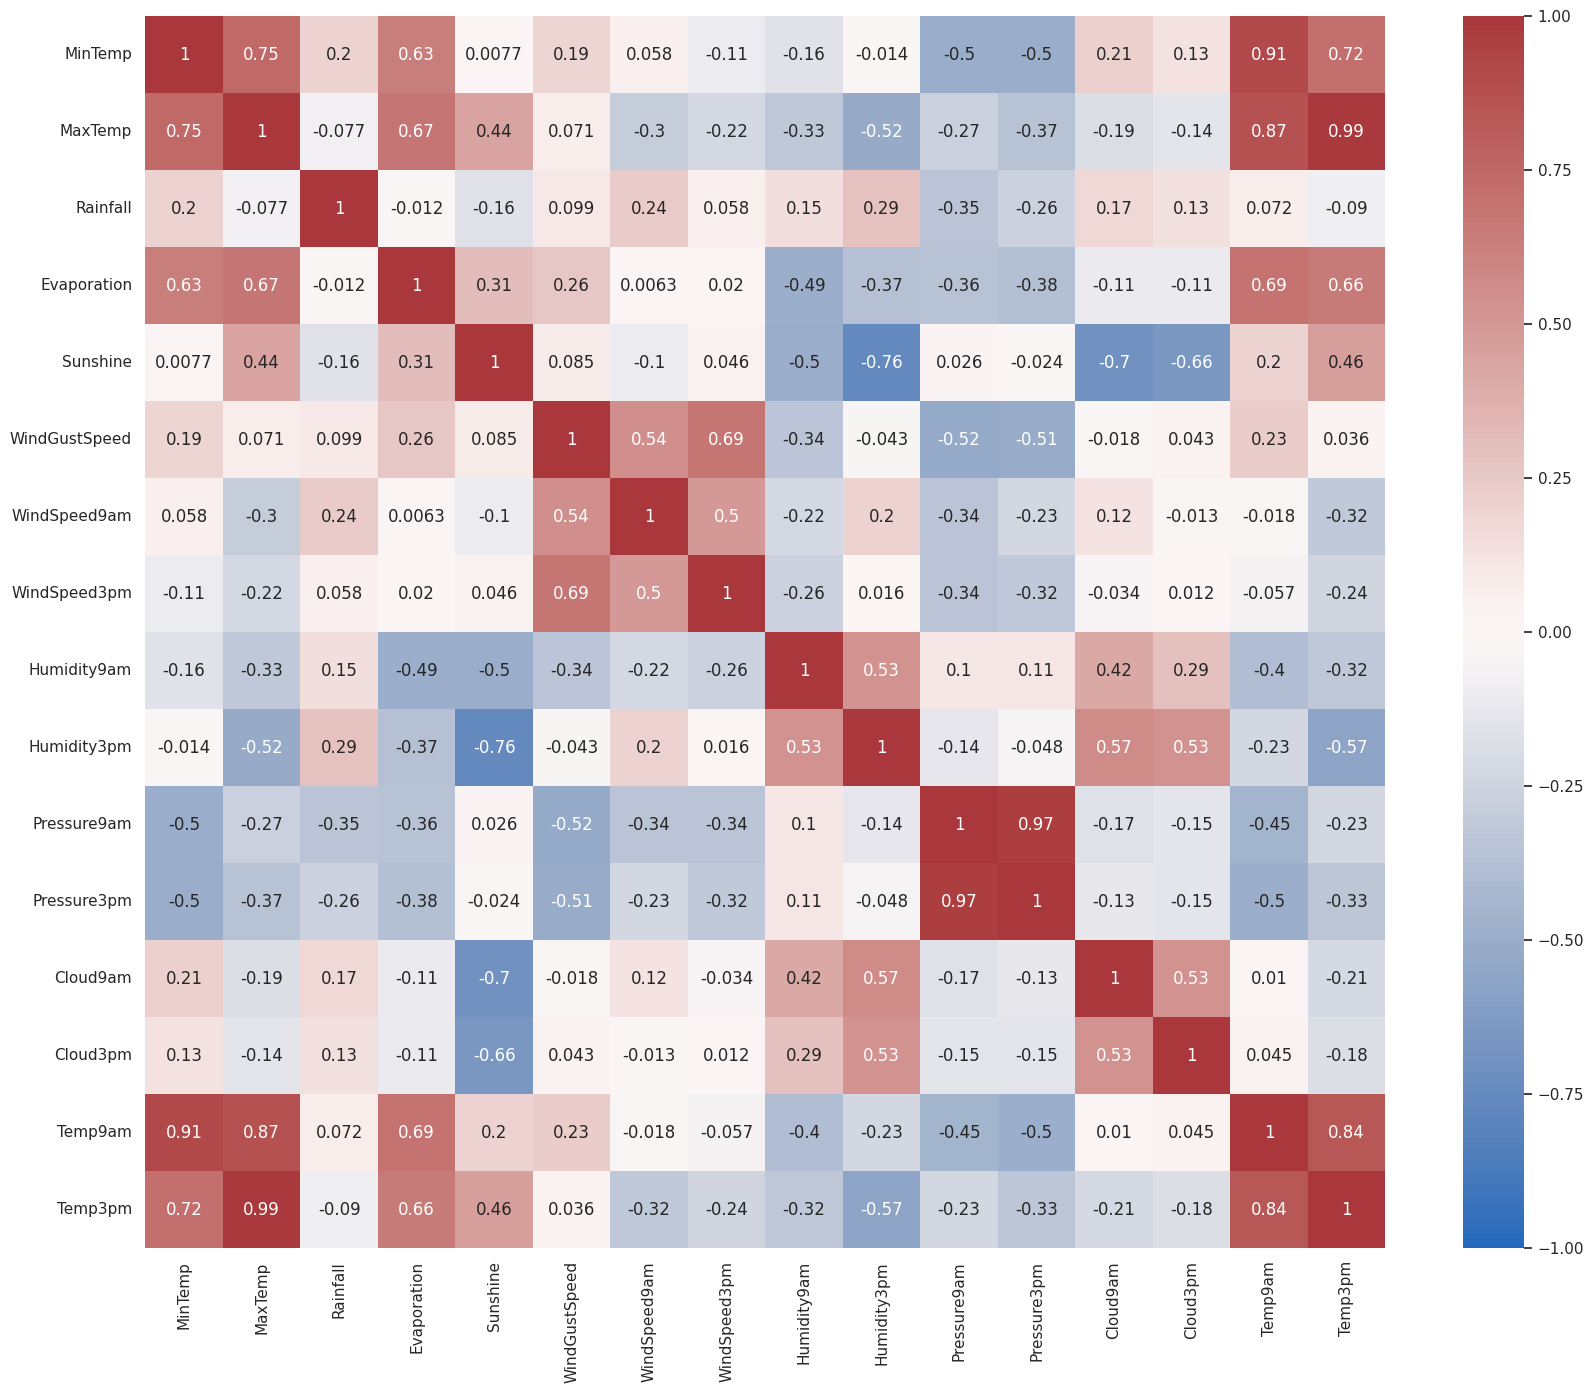

In [18]:
import seaborn as sns
sns.set()

plt.figure(figsize=(20, 16))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='vlag', vmin=-1, vmax=1)

In [19]:
# Uczenie na danych treningowych

perceptron_model = Perceptron(eta0=0.1, random_state=2)
perceptron_model.fit(X_train, y_train)
print(perceptron_model.n_iter_)

6


In [20]:
# Testujemy na danych uczących i testowych

predictions_train = perceptron_model.predict(X_train)
predictions_test = perceptron_model.predict(X_test)

In [21]:
accuracy_t = accuracy_score(y_train, predictions_train)
accuracy = accuracy_score(y_test, predictions_test)
accuracy_t, accuracy

(0.8664122137404581, 0.9393939393939394)

In [22]:
cm_train = confusion_matrix(y_train, predictions_train)
cm_test = confusion_matrix(y_test, predictions_test)
cm_test, cm_train

(array([[56,  0],
        [ 4,  6]]),
 array([[197,  15],
        [ 20,  30]]))

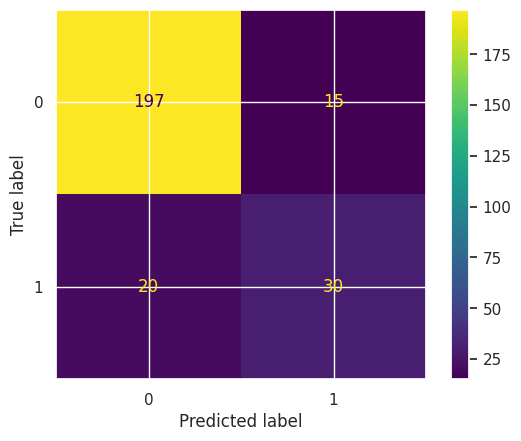

In [23]:
ConfusionMatrixDisplay(cm_train).plot()

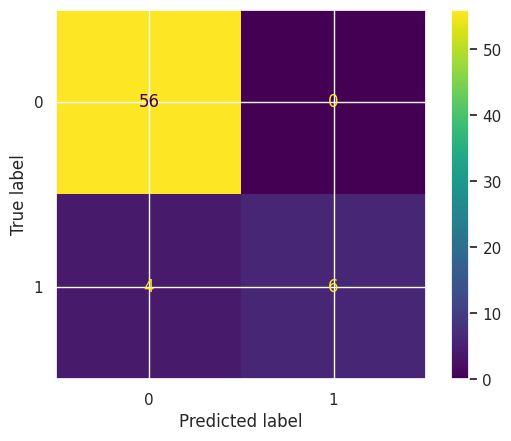

In [24]:
ConfusionMatrixDisplay(cm_test).plot()

In [25]:
###################################################################################################################

In [26]:
# WYKORZYSTANIE MLP

from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
print(perceptron_model.n_iter_)

6


In [27]:
predictions_train = mlp_model.predict(X_train)
predictions_test = mlp_model.predict(X_test)

In [28]:
accuracy_t = accuracy_score(y_train, predictions_train)
accuracy = accuracy_score(y_test, predictions_test)
accuracy_t, accuracy

(1.0, 0.9090909090909091)

In [29]:
cm_train = confusion_matrix(y_train, predictions_train)
cm_test = confusion_matrix(y_test, predictions_test)
cm_test, cm_train

(array([[55,  1],
        [ 5,  5]]),
 array([[212,   0],
        [  0,  50]]))

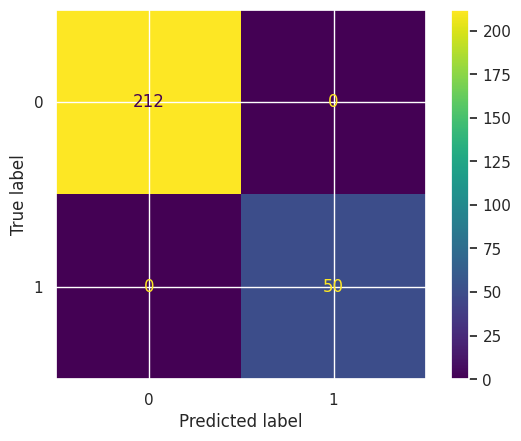

In [30]:
ConfusionMatrixDisplay(cm_train).plot()

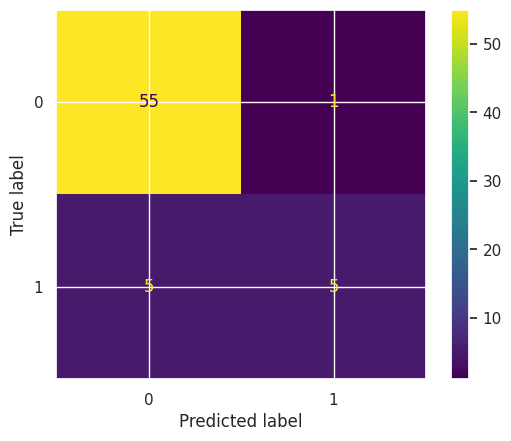

In [31]:
ConfusionMatrixDisplay(cm_test).plot()

In [32]:
###################################################################################################################

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty=None)
lr.fit(X_train, y_train)

LogisticRegression(penalty=None)

In [34]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8816793893129771, 0.9393939393939394)

In [35]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [36]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

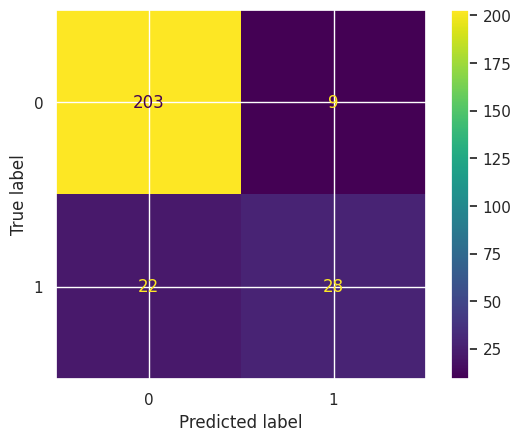

In [37]:
ConfusionMatrixDisplay(cm_train).plot()

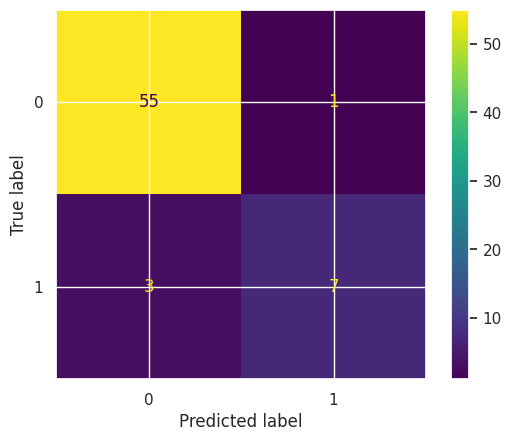

In [38]:
ConfusionMatrixDisplay(cm_test).plot()

In [39]:
y_train_proba = lr.predict_proba(X_train)

In [40]:
y_test_proba = lr.predict_proba(X_test)

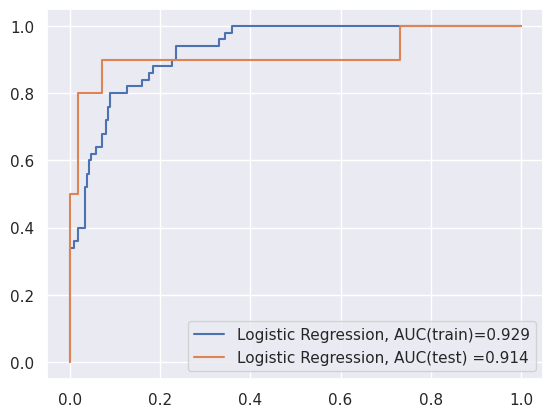

In [41]:
import matplotlib.pyplot as plt
plt.figure()

fpr, tpr, _ = roc_curve(y_train, y_train_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Logistic Regression, AUC(train)={:.3f}'.format(roc_auc))

fpr, tpr, _ = roc_curve(y_test, y_test_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Logistic Regression, AUC(test) ={:.3f}'.format(roc_auc))

plt.legend()